<a href="https://colab.research.google.com/github/soohyoen/artificial-intelligence/blob/main/AI_RL_Q_Learning(intro)_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reinforcement Learning

## 2016년 구글 딥마인드의 알파고는 
## 인간이 몇십 년 동안 컴퓨터에게 절대 지지 않았던 바둑에서 
## 거의 완벽한 승리를 거뒀습니다. 
---
---
## 경우의 수가 우주의 원자 수 보다 많다는 바둑에서 알파고는 
## **전통적 탐색 기법**에 강화학습을 조합한 새로운 방법으로 
## 바둑의 세계 최고수 중 한 명인 이세돌 9단을 4:1로 이겼습니다.

## 그 후 알파고의 실력을 뛰어넘는 알파고 제로(AlphaGo Zero), 
## 알파 제로(Alpha Zero) 등이 발표되면서 
## 바둑에서 인간은 더 이상 컴퓨터를 이길 수 없음이 명확해 졌습니다.

---
---

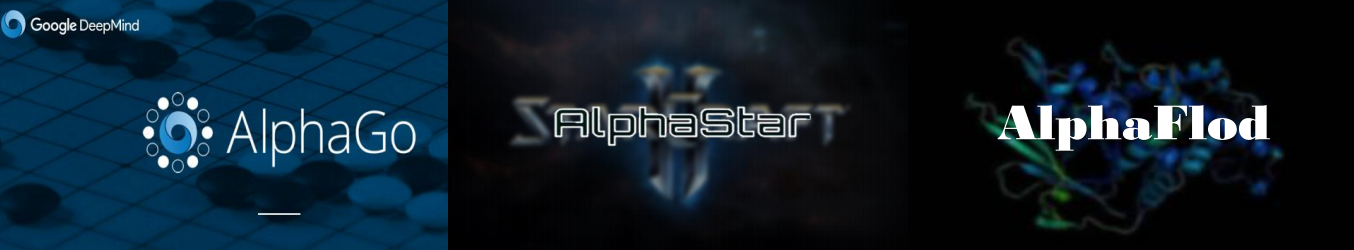

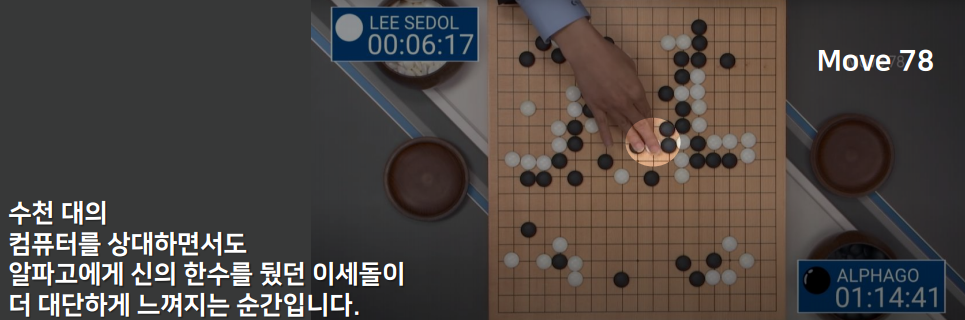

## 강화학습은 **실수와 보상을 통해 배우는 알고리즘**입니다. 
---
---
## 신경망이 정답과 예측 사이의 오차를 역전파해서 
## 의미 있는 파라미터를 학습하는 것 처럼 
---
---
## 강화학습은 **좋은 선택과 나쁜 선택**에서 모두 배웁니다.
## 강화학습은 신경망이 없어도 동작할 수 있지만 
## 본격적으로 주목받기 시작한 것은 
---
---
## 알파고와 그 이전의 딥 큐러닝 신경망처럼 
## **강화학습에 딥러닝 신경망을 사용하기 시작한 이후** 부터입니다.

# 신경망으로 '경험' 학습하기.
---
---

## 먼저 강화학습의 환경으로 사용할 **Gym**에 대해 알아보겠습니다. 
## OpenAI 재단과 딥마인드는 
## 현재 세계의 강화학습 연구에 가장 선도적인 두 단체입니다. 
---
---
## OpenAI 재단은 강화학습의 이론을 학습하기 위해 만들어 놓은 환경인 
## Gym을 2016년에 발표하였습니다. 
---
---
## Gym에는 전통적인 알고리즘 흉내 내기, Box2D를 사용한 간단한 물리 조작계,
## 아타리(Atari)게임, 로봇 시뮬레이션 등 다양한 환경이 포함돼 있고, 
## 다른 연구자들이 Gym과 호환되는 새로운 환경을 만들어서 배포하는 것 또한 가능합니다.

## Gym의 구조는 강화학습에서 요구하는 표준적인 구조입니다.
----
## 일단 문제가 주어진 **환경(Environment)**이 있고,
## 강화학습 문제를 풀기 위한 **에이전트(Agent)**가 존재합니다. 
## 에이전트는 **행동(action)**으로 환경에 영향을 주고, 
## 그 결과에 따라 **보상(reward)**을 받습니다.
---
---
## 좋은 보상을 받으면 에이전트는 그 행동을 더 많이 하게 되고,
## 나쁜 보상을 받으면 그 행동을 덜 하도록 학습하는 것이 
## 강화학습의 기본입니다.

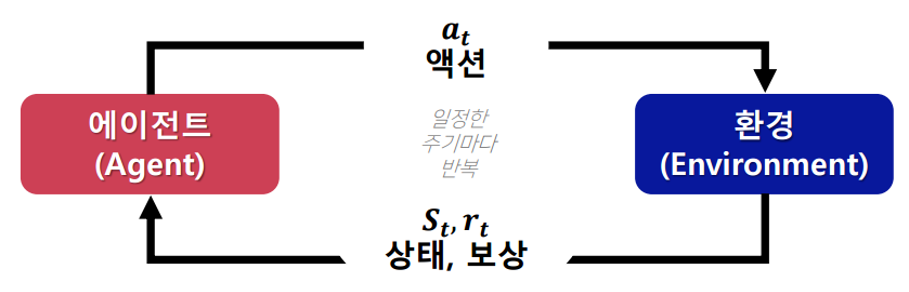

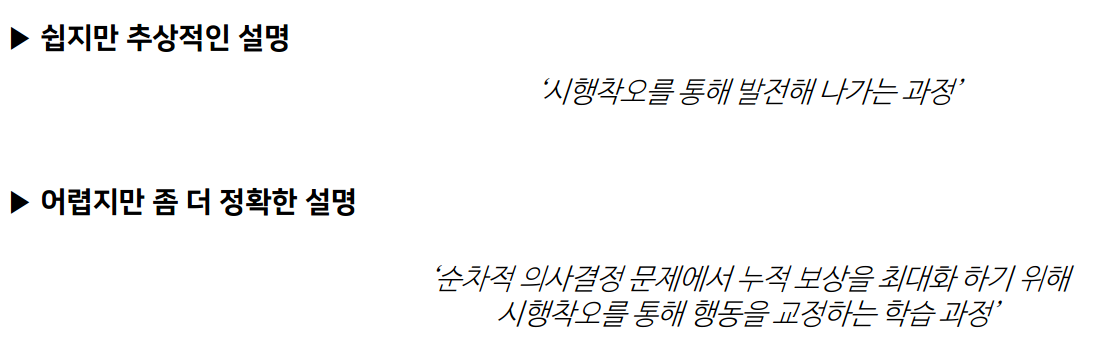

## 강화학습은 게임과 비슷한 면이 있습니다. 
## 주어진 게임 환경에서 최적의 행동으로 좋은 **보상(점수)을 획득**해서 이기는 것이 목표인 것 처럼 
## 강화학습도 행동의 결과로 주어지는 **보상을 극대화**하는 데 주 목적이 있습니다.
## 딥마인드가 초기에 발표한 아타리 게임을 푸는
## 딥 큐러닝 신경망이나 알파고 등이 모두 
## 게임에 대한 강화학습인 것을 생각해본다면 
## 강화학습과 게임은 꽤 잘 어울린다고 할 수 있습니다. 
---
---
## 최근에는 단백질 구조의 문제를 풀거나 **딥러닝 신경망 자체의 구조를 탐색**하는 NASNet,
## 강화학습으로 딥러닝의 최적 파라미터를 찾는 AutoML 등 
## 강화학습은 게임에만 국한되지 않고 그 분야를 점점더 넓혀가고 있습니다. 

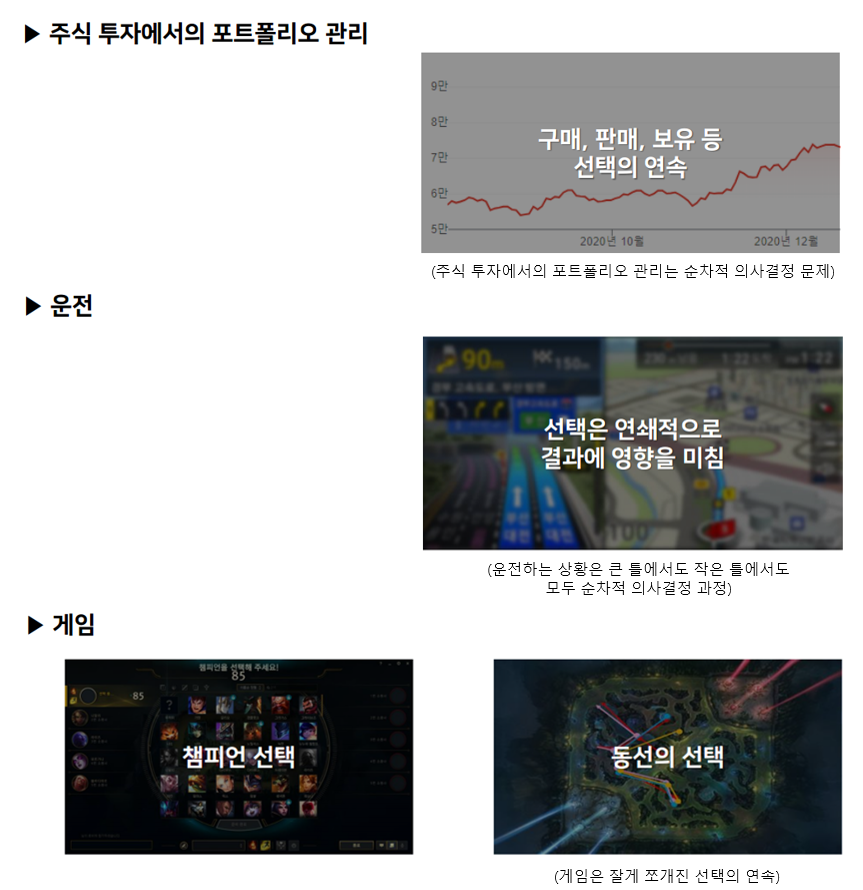

# 보상

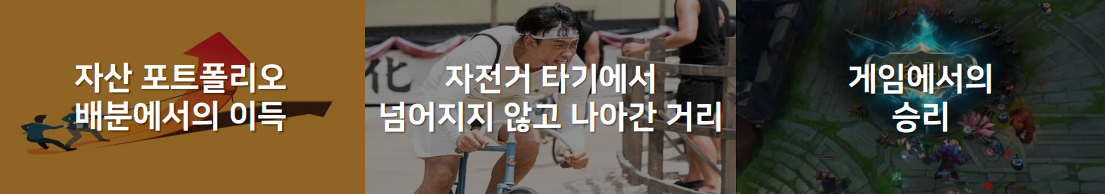

## 우리가 이번에 풀어볼 문제는 여기에서 제공하는 쉬운 문제들 중 하나인 
## **MountainCar-v0** 입니다.
## 두 바퀴가 달린 **차(에이전트)**로 **언덕(환경)**을 올라가는 문제입니다. 
## 이때 **보상은 각 시간단위(time step)**마다 -1이 주어지고,
## 오른쪽의 깃발에 도달하면 하나의 **에피소드(episode)**가 끝납니다.
---
---
## (※ 에이전트가 하나의 강화학습 환경을 완료할 때까지의 시간 단위를 묶어서
## 에피소드 라고 합니다. 에피소드가 끝나면 보통 환경은 리셋되고 에이전트는 
## 첫 시작 상태로 돌아갑니다.)  

## 이 환경에서 에이전트가 취할 수 있는 행동은 
## **'왼쪽으로 이동', '정지', '오른쪽으로 이동'**의 3가지 입니다.
---
---
## 그런데 여기에는 한 가지 문제가 있습니다. 
## **오른쪽으로 이동하는 행동**은 **가파른 언덕**을 올라갈 만큼의 
## 충분한 힘을 받지 못하기 때문에 
## 에이전트는 이 행동만으론 언덕을 오를 수 없습니다. 
## 왼쪽과 오른쪽으로 반복해서 움직이며 
## **가속도**를 붙인 다음에야 언덕을 오를 수 있습니다. 

## 우린 이 문제를 우선 '신경망'만 으로 풀어보도록 하겠습니다.

In [1]:
import gym
import random
import tensorflow as tf
# 현재 model.predict() 의 속도가 느린 문제가 있어서 eager_execution을 끕니다
tf.compat.v1.disable_eager_execution()
import numpy as np

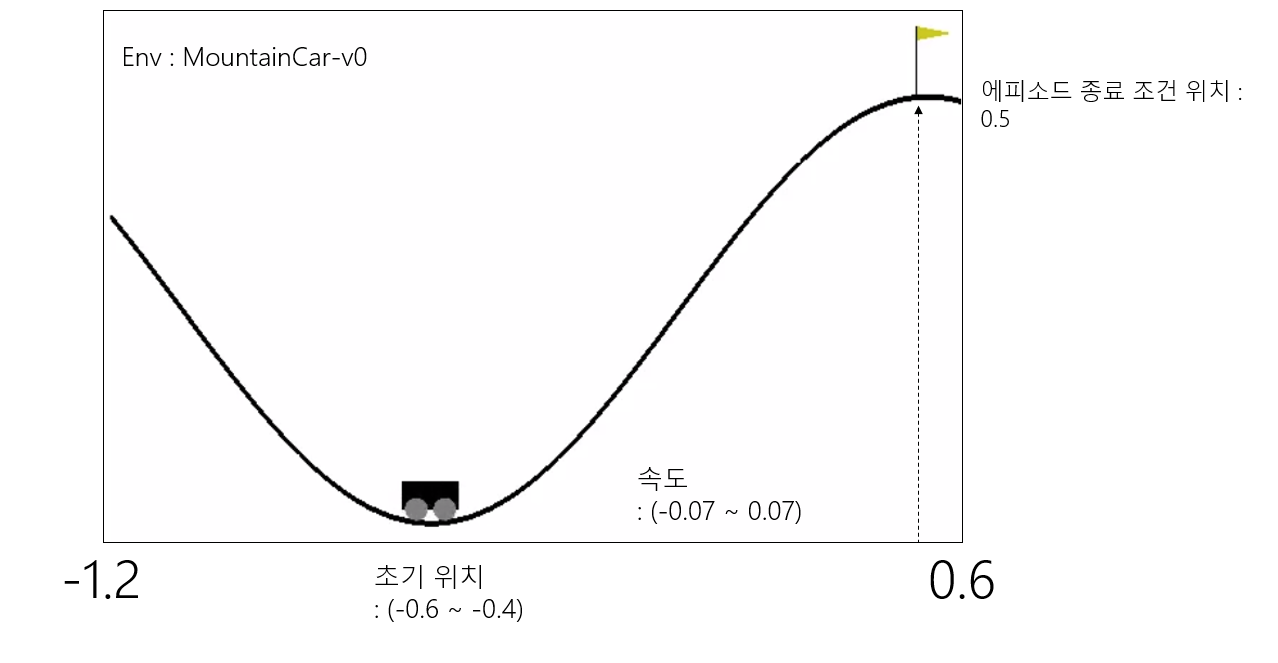

In [2]:
# gym.make()를 통해 환경을 만들어 주고, 
# 환경안에 속한 몇 가지 변수를 출력해보도록 하겠습니다.
env = gym.make('MountainCar-v0')

print("env.observation_space : \n", env.observation_space)
# 환경 공간은 에이전트가 환경을 볼 수 있는 작은 창입니다. 
# 에이전트는 이 관찰 공간을 통해서만 환경의 정보를 파악할 수 있습니다. 
# 그래서 관찰 공간에 대한 정보는 모든 환경에서 최우선적으로 파악해야 합니다.
# 결과값을 살펴보면 최소값과 최대값을 가지는 범위의 값(2,) 이 나오며
# 최소값과 최대값을 함께 알려줍니다.
# 첫 번째 수는 환경의 x축 좌표 최소값, 
# 두 번째 수는 환경의 x축 좌표 최대값이 됩니다. 

env.observation_space : 
 Box(-1.2000000476837158, 0.6000000238418579, (2,), float32)


In [3]:
# 다음 각 low, high를 출력하여 보면 
# 두 개의 값이 각각 출력되어 집니다.
# 여기서 첫 번째 값은 공간상의 최소값 최대값이며, 
# 두 번째 값은 차의 속도입니다.
# 차의 속도에는 방향을 포함하고 있는데, 
# 속도가 음수라면 왼쪽으로, 양수이면 오른쪽 깃발을 향한 방향으로 
# 움직이는 것입니다.
print("env.observation_space.low  : \n", env.observation_space.low)
print("env.observation_space.high  : \n", env.observation_space.high)

env.observation_space.low  : 
 [-1.2  -0.07]
env.observation_space.high  : 
 [0.6  0.07]


In [4]:
# 다음은 에이전트가 취할 수 있는 행동의 경우의 수를 나타냅니다.
# 출력되어지는 결괏값을 살펴보면 3이라는 값이 출력되어 집니다.
# 이는 에이전트가 3가지 행동을 취할 수 있다는 것입니다. 
print("env.action_space : ", env.action_space)

# 0 → 왼쪽으로 이동
# 1 → 정지
# 2 → 오른쪽으로 이동

env.action_space :  Discrete(3)


In [5]:
# 모든 에피소드에는 종료조건이 있습니다.
# 깃발에 도달하는 것도 종료 조건이지만, 
# 에피소드가 무한히 계속되는 것을 방지하기 위해
# 최대 시간 단위의 제한을 둡니다. 
# 여기서는 200번째 시간 단위에서 종료가 되어집니다.  
print(env._max_episode_steps)

200


## 그럼 먼저 랜덤한 행동을 하는 에이전트를 실행하여 보겠습니다.
## 본격적인 학습에 들어가기 전에 랜덤한 행동을 하는 에이전트를 
## 투입해보는 것은 환경을 가볍게 파악하고 학습 전략을 짜는 데 
## 도움이 됩니다. 

In [6]:
step = 0    # 몇 번째 시도인지를 알려주는 변수입니다.
            # 이 수가 200이 되면 시도는 종료됩니다. 
score = 0   # reward를 의미하는 score 값입니다.

# 환경을 초기화 하여 줍니다. 
# 각 에피소드가 시작(초기화)될 때 차(에이전트)의 위치는
# -0.6 ~ -0.4  사이의 랜덤한 위치에서 시작됩니다. 
# 두 번째 값은 속도를 의미합니다. 
# 초기화 되어있기 때문에 속도는 0을 출력하게 됩니다. 
env.reset()

array([-0.55770741,  0.        ])

In [7]:
# 무작위 행동을 수행하는 sample()를 수행하여 줍니다. 
# 이때 0, 1, 2 중 하나의 값을 반환하여 줍니다. 
action = env.action_space.sample()
print("action : ", action)

action :  0


In [8]:
# 다음은 에이전트가 행동을 전달함과 동시에 
# 시간 단위가 흘러갑니다. 
# 그 결과 환경이 영향을 받아서 바뀐 
# 관찰 상태(obs), 보상(reward), 에피소드 종료 여부(done), 기타정보(info)를 반환받습니다. 
# 반환 값 중 기타 정보를 제외한 3가지 값은 강화학습에 필수적인 정보입니다. 
# 여기서 info의 값은 생략도 가능하기에 '_' 로 생략하여 받기도 합니다. 
obs, reward, done, info = env.step(action)

print("obs : ", obs)
print("reward : ", reward)
print("done : ", done)
print("info : ", info)

obs :  [-0.55845204 -0.00074463]
reward :  -1.0
done :  False
info :  {}


## 이를 반복하여 출력할 수 있도록 코드를 작성하여 주겠습니다. 

In [ ]:
step = 0    # 몇 번째 시도인지를 알려주는 변수 
score = 0   # reward를 의미하는 score 값입니다.
env.reset()

# 종료조건이 걸릴 때 까지 반복할 수 있도록 
# while 문을 걸어주도록 합니다. 
while True:
    action = env.action_space.sample()
    obs, reward, done, info = env.step(action)
    print(score) # 초기화된 score값 부터 하여 누적 스코어 값을 출력합니다. 
    score += reward # 받은 보상(reward)을 score에 누적하여 저장해 주도록 합니다. 
    step += 1       # 현재 몇 번째 시도인지 확인을 위해 step 변수에 1씩 추가하여 저장합니다. 
    
    if done:        # 종료여부의 확인 변수인 'done' 이 True 라면 break를 걸어 반복을 멈춰줍니다.  
        break 
                    # 만약 200번 시도 안으로 깃발에 도달하게 되면 학습은 종료됩니다. 
                    # 마찬가지로 깃발에 도달하지 못한 상태에서 200번을 학습하게 되어도 학습은 종료됩니다. 
print('score : ', score)
print('step  : ', step)

0
-1.0
-2.0
-3.0
-4.0
-5.0
-6.0
-7.0
-8.0
-9.0
-10.0
-11.0
-12.0
-13.0
-14.0
-15.0
-16.0
-17.0
-18.0
-19.0
-20.0
-21.0
-22.0
-23.0
-24.0
-25.0
-26.0
-27.0
-28.0
-29.0
-30.0
-31.0
-32.0
-33.0
-34.0
-35.0
-36.0
-37.0
-38.0
-39.0
-40.0
-41.0
-42.0
-43.0
-44.0
-45.0
-46.0
-47.0
-48.0
-49.0
-50.0
-51.0
-52.0
-53.0
-54.0
-55.0
-56.0
-57.0
-58.0
-59.0
-60.0
-61.0
-62.0
-63.0
-64.0
-65.0
-66.0
-67.0
-68.0
-69.0
-70.0
-71.0
-72.0
-73.0
-74.0
-75.0
-76.0
-77.0
-78.0
-79.0
-80.0
-81.0
-82.0
-83.0
-84.0
-85.0
-86.0
-87.0
-88.0
-89.0
-90.0
-91.0
-92.0
-93.0
-94.0
-95.0
-96.0
-97.0
-98.0
-99.0
-100.0
-101.0
-102.0
-103.0
-104.0
-105.0
-106.0
-107.0
-108.0
-109.0
-110.0
-111.0
-112.0
-113.0
-114.0
-115.0
-116.0
-117.0
-118.0
-119.0
-120.0
-121.0
-122.0
-123.0
-124.0
-125.0
-126.0
-127.0
-128.0
-129.0
-130.0
-131.0
-132.0
-133.0
-134.0
-135.0
-136.0
-137.0
-138.0
-139.0
-140.0
-141.0
-142.0
-143.0
-144.0
-145.0
-146.0
-147.0
-148.0
-149.0
-150.0
-151.0
-152.0
-153.0
-154.0
-155.0
-156.0
-157.0
-158.0


## 결괏값을 살펴보면 매 스텝마다 score가 -1씩 더해지며 
## 출력되는 것을 확인할 수 있습니다. 

# 다음은 학습 결과를 영상으로 출력하기위한 과정입니다.

In [ ]:
!pip install gym pyvirtualdisplay
!apt-get install -y xvfb python-opengl ffmpeg

!apt-get update
!apt-get install cmake
!pip install --upgrade setuptools
!pip install ez_setup
!pip install gym[atari]

!pip install box2d-py
!pip install gym[Box_2D]

Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:3.4.8-0ubuntu0.2).
Suggested packages:
  libgle3
The following NEW packages will be installed:
  python-opengl xvfb
0 upgraded, 2 newly installed, 0 to remove and 37 not upgraded.
Need to get 1,281 kB of archives.
After this operation, 7,686 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 python-opengl all 3.1.0+dfsg-1 [496 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 xvfb amd64 2:1.19.6-1ubuntu4.9 [784 kB]
Fetched 1,281 kB in 1s (1,162 kB/s)
Selecting previously unselected package python-opengl.
(Reading database ... 155013 files and directories currently installed.)
Preparing to unpack .../python-opengl_3.1.0+dfsg-1_all.deb ...
Unpacking python-opengl (3.1.0+dfsg-1) ...
Selecting previously unselected package xvfb.
Preparing to unpack .../xvfb_2%3a1.19.6-1ubuntu4.9_amd

  Created wheel for ez-setup: filename=ez_setup-0.9-py3-none-any.whl size=11013 sha256=37f770f67f06d4234b1b6be02a7a995afc48a3f57a9633f16671e22d803c22ef
  Stored in directory: /root/.cache/pip/wheels/f4/78/bd/f88c8eddfd5a8bf2a029e5cd8bc7a9914597002b081a000ffe
Successfully built ez-setup
     |████████████████████████████████| 448 kB 2.2 MB/s 


In [ ]:
from gym import logger as gymlogger
from gym.wrappers import Monitor
gymlogger.set_level(40) 
import glob
import io
import base64
from IPython.display import HTML
from IPython import display as ipythondisplay
from pyvirtualdisplay import Display

In [ ]:
env = gym.make('MountainCar-v0')

In [ ]:
# 영상 출력 셋팅 및 저장을 위한 함수 입니다. 
def show_video():
    mp4list = glob.glob('video/*.mp4')
    if len(mp4list) > 0:
        mp4 = mp4list[0]
        video = io.open(mp4, 'r+b').read()
        encoded = base64.b64encode(video)
        ipythondisplay.display(HTML(data='''<video alt="test" autoplay 
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
    else: 
        print("Could not find video")
    
# 환경을 전달받아 출력해주는 함수입니다. 
def wrap_env(env):
    env = Monitor(env, './video', force=True)
    return env
  
#영상 크기 지정 및 출력 
display = Display(visible=0, size=(1400, 900))
display.start()

## 다시한번 학습과 학습결과를 
## mp4로 출력하는 과정입니다.

In [ ]:
env = wrap_env(gym.make('MountainCar-v0'))
env.reset()

step = 0    # 몇 번째 시도인지를 알려주는 변수 
score = 0   # reward를 의미하는 score 값입니다.

# 종료조건이 걸릴 때 까지 반복할 수 있도록 
# while 문을 걸어주도록 합니다. 
while True:
    action = env.action_space.sample()
    obs, reward, done, info = env.step(action)
    score += reward # 받은 보상(reward)을 score에 누적하여 저장해 주도록 합니다. 
    step += 1       # 현재 몇 번째 시도인지 확인을 위해 step 변수에 1씩 추가하여 저장합니다. 
    
    if done:        # 종료여부의 확인 변수인 'done' 이 True 라면 break를 걸어 반복을 멈춰줍니다.  
        break 
                    # 만약 200번 시도 안으로 깃발에 도달하게 되면 학습은 종료됩니다. 
                    # 마찬가지로 깃발에 도달하지 못한 상태에서 200번을 학습하게 되어도 학습은 종료됩니다. 

# 환경 종료 및 영상 출력입니다. 
env.close()
show_video()

In [ ]:
action = env.action_space.sample()
obs, reward, done, info = env.step(action)

In [ ]:
obs

array([-0.55625597, -0.00790823])

## 에이전트는 앞뒤로 움직이면서 약간 가속이 붙긴 하지만 
## 언덕 위로 올라가기 전에 **200스텝이 다 되어 에피소드 종료**가 되어집니다. 
## 좀 더 움직이다 보면 계속 가속이 붙어서 언덕 위로 올라갈 수도 있겠지만 
## 이 환경에서는 200스텝안에 목표인 깃발에 도달해야 합니다. 

## 그렇다면 어떻게 해야 이 문제를 풀 수 있을까요?
---
---
## 이 문제를 풀기 위해서는 여러 번의 에피소드 중 성공적인 에피소드를 저장한 다음, 
## 그때 행동했던 데이터를 신경망에 학습시키는 방법을 사용해 보면 어떨까 합니다.
## 앞서 '분류'에서 배운 것 처럼 
## 어떤 관찰 상태(observation state)에서 
## 어떤 행동을 해야 하는지를 학습하는 것이죠. 
## **상태**와 **행동**을 **신경망의 입력과 출력**으로 사용하는 것입니다. 

In [ ]:
env = gym.make('MountainCar-v0')

scores = []               # 에피소드가 종료되었을 때의 최종 점수를 저장할 변수. 
training_data = []        # 성공적인 에피소드의 환경과 행동정보를 저장할 변수.
accepted_scores = []      # 가속도를 받아 앞으로 간 상황에서의 에피소드별 점수를 담은 변수.
required_score = -198     # 완화된 리워드 받는 조건(-198점) 
                          # 이전 리워드는 스텝당 -1 점 

# 충분한 학습 데이터 확보를 위해 
# 에피소드를 10,000번 반복하여 주도록 하겠습니다.

for i in range(10000):
    # 100번째 에피소드마다의 인덱스를 출력합니다.  
    if i % 100 == 0:
        print("Now episode : ", i)    

    # 새로운 에피소드마다 환경 및 점수 초기화 
    env.reset()
    score = 0
    
    # 신경망의 입력 데이터(상태정보-위치,속도)와 출력 데이터(행동)를 저장하기 위한 변수 
    game_memory = []
    # 이전 스텝의 관찰 상태(obs)를 저장하기위한 변수 
    previous_obs = []

    # 종료조건을 충족하지 않는한 무한 반복
    while True:
        # 무작위 행동 
        action = env.action_space.sample()
        # 행동 결과 반환 
        obs, reward, done, info = env.step(action)
        
        # 만약 이전 상태의 정보가 있는 경우(모든 에피소드별 상태의 정보를 저장하기 위한 코드)
        if len(previous_obs) > 0:

            # game_memory 변수에 previous_obs(이전 상태의 환경정보), action(행동)를 
            # 저장하여 줍니다.   
            game_memory.append([previous_obs, action])

        # 현재 수행한 행동의 결과 중 환경 정보를 previous_obs 변수에 저장합니다. 
        previous_obs = obs 
        
        
        # 기존까지의 성공적인 에피소드의 조건은 깃발에 도달하는 것이었습니다. 
        # (깃발 도달 전까지 스텝별 보상은 -1)
        # 하지만 이는 아무런 정보가 없는 상태(무작위 행동)에서는 
        # 너무 어려운 에피소드라 판단되기에 보상의 기준을 조금 완화해주도록 합니다.  

        # 성공적인 에피소드는 가속도를 이용해 
        # 약간이라도 앞으로 전진한 에피소드(required_score = -198) 라 간주합니다.
        # 그리고 충분히 앞으로 전진했을 때 -1 대신 +1을 주도록 보상 식을 변경하여 줍니다.  
        
        # 만약 obs[0](에이전트의 위치)가 -0.2보다 크다면 보상을 1점 주도록 합니다. 
        # 초기 위치가 -0.6 ~ -0.4 임을 고려한다면 약간 오른쪽으로 나아간 것이라 할 수 있습니다.
        if obs[0] > -0.2:
            reward = 1
        
        # 보상을 score에 저장합니다.  
        score += reward

        # 마찬가지로 깃발에 도달하거나 
        # 200번의 스텝을 모두 수행한다면 학습은 중단되어 집니다. 
        if done:
            break 
    # 에피소드별 종료되었을 때의 최종 점수(score)를 scores 변수에 저장합니다. 
    scores.append(score)
    
    # 만약 에피소드에서 얻은 점수(score)가 required_score(-198)보다 값이 크다면
    # 즉 가속도를 받아 앞으로 간 상황의 에피소드라면  
    if score > required_score:
        # 그 에피소드의 score값을 accepted_scores 변수에 저장합니다. 
        accepted_scores.append(score)
        
        # 그리고 가속도를 받아  
        # 앞으로 간 상태의 정보(previous_obs(에이전트의 위치, 속도))와 
        # 행동 정보(action)을 training_data 변수에 할당하여 줍니다.

        # 이로서 보상을 받은 경우에 대한 정보를 데이터화 시켜주었습니다.
        for data in game_memory:
            training_data.append(data)

scores = np.array(scores)

Now episode :  0
Now episode :  100
Now episode :  200
Now episode :  300
Now episode :  400
Now episode :  500
Now episode :  600
Now episode :  700
Now episode :  800
Now episode :  900
Now episode :  1000
Now episode :  1100
Now episode :  1200
Now episode :  1300
Now episode :  1400
Now episode :  1500
Now episode :  1600
Now episode :  1700
Now episode :  1800
Now episode :  1900
Now episode :  2000
Now episode :  2100
Now episode :  2200
Now episode :  2300
Now episode :  2400
Now episode :  2500
Now episode :  2600
Now episode :  2700
Now episode :  2800
Now episode :  2900
Now episode :  3000
Now episode :  3100
Now episode :  3200
Now episode :  3300
Now episode :  3400
Now episode :  3500
Now episode :  3600
Now episode :  3700
Now episode :  3800
Now episode :  3900
Now episode :  4000
Now episode :  4100
Now episode :  4200
Now episode :  4300
Now episode :  4400
Now episode :  4500
Now episode :  4600
Now episode :  4700
Now episode :  4800
Now episode :  4900
Now episode 

In [ ]:
# 에피소드별 보상점수가 -198 보다 높은 경우를 출력합니다.  
print("accepted_scores : \n", accepted_scores)  

# 전체 에피소드의 평균 score 값을 연산합니다. 
print("scores.mean() : ", scores.mean())

# 약간 앞으로 간 경우(score가 -198 보다 높은 경우)의 score값의 최대, 최소값을 연산합니다.
print("max(accepted_scores) : ", max(accepted_scores))
print("min(accepted_scores) : ", min(accepted_scores))

# 전체 에피소드의 횟수 및 성공한 에피소드의 횟수 출력
print("len(scores) : ", len(scores))
print("len(accepted_scores) : ", len(accepted_scores))

accepted_scores : 
 [-174.0, -182.0, -180.0, -194.0, -194.0, -194.0, -192.0, -194.0, -182.0, -172.0, -188.0, -186.0, -190.0, -176.0, -178.0, -186.0, -186.0, -178.0, -170.0, -180.0, -182.0, -186.0, -190.0, -190.0, -182.0, -168.0, -154.0, -190.0, -174.0, -180.0, -180.0, -192.0, -194.0, -174.0, -172.0, -184.0, -176.0, -178.0, -188.0, -172.0]
scores.mean() :  -199.928
max(accepted_scores) :  -154.0
min(accepted_scores) :  -194.0
len(scores) :  10000
len(accepted_scores) :  40


## 결괏값을 살펴보면 깃발에 도달하게 되는 경우는 없었으며 
## 가속도를 받아 앞으로 가는 경우는 대체로
## 10,000번 중 50번 미만임을 확인할 수 있습니다.
## 하지만 에피소드별 스텝은 200번이니 
## 학습 데이터의 수는 약 10,000개 정도가 됩니다.  

In [ ]:
print("len(training_data) : " , len(training_data))
training_data[:5]

len(training_data) :  7960


[[array([-0.42510156, -0.0017405 ]), 2],
 [array([-0.42657009, -0.00146853]), 1],
 [array([-0.4287561 , -0.00218601]), 1],
 [array([-0.43164387, -0.00288777]), 0],
 [array([-0.43621259, -0.00456872]), 1]]

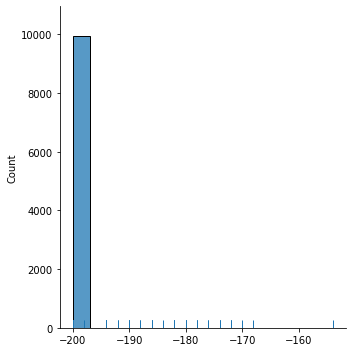

In [ ]:
import seaborn as sns 
import matplotlib.pyplot as plt

sns.displot(scores, rug = True)
plt.show()
# 전체 에피소드별 score값을 시각화 합니다.  

In [ ]:
# 학습 데이터의 독립변수 종속변수를 생성하는 과정입니다. 
# 현재 training_data는 다음과 같은 형식으로 되어 있습니다. 
# [array([-0.77629319,  0.00603715]), 0]
# [array([에이전트의 위치,  속도]), 행동]

# 독립변수(train_X)는 첫 번째 [에이전트의 위치,  속도]로 할당하기 위한 코드를 작성합니다.
# reshape(-1, 2)의 의미는 모든 데이터를 2차원으로 할당하겠다는 의미가 됩니다. 
train_X = np.array([i[0] for i in training_data]).reshape(-1, 2)

# 종속변수(train_Y)는 두 번째 '행동'으로 할당하기 위한 코드를 작성합니다. 
train_Y = np.array([i[1] for i in training_data]).reshape(-1, 1)
print("train_X.shape : ", train_X.shape)
print("train_Y.shape : ", train_Y.shape)

train_X.shape :  (7960, 2)
train_Y.shape :  (7960, 1)


In [ ]:
# 다음은 신경망 모델구조를 구축하는 과정입니다. 
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(units=128, input_shape = (2,), activation='relu'),
                             tf.keras.layers.Dense(units=32, activation='relu'),
                             tf.keras.layers.Dense(units=3, activation='softmax')
])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               384       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 99        
Total params: 4,611
Trainable params: 4,611
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer=tf.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_X, train_Y, epochs=30, batch_size=16, validation_split=0.25)

Train on 5970 samples, validate on 1990 samples
Epoch 1/30
5970/5970 [==============================] - 1s 129us/sample - loss: 1.0989 - accuracy: 0.3235 - val_loss: 1.0989 - val_accuracy: 0.3377
Epoch 2/30
 736/5970 [==>...........................] - ETA: 0s - loss: 1.0971 - accuracy: 0.3913

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


5970/5970 [==============================] - 1s 88us/sample - loss: 1.0983 - accuracy: 0.3449 - val_loss: 1.0974 - val_accuracy: 0.3337
Epoch 3/30
5970/5970 [==============================] - 1s 85us/sample - loss: 1.0975 - accuracy: 0.3551 - val_loss: 1.0962 - val_accuracy: 0.3854
Epoch 4/30
5970/5970 [==============================] - 1s 91us/sample - loss: 1.0960 - accuracy: 0.3683 - val_loss: 1.0925 - val_accuracy: 0.3925
Epoch 5/30
5970/5970 [==============================] - 1s 86us/sample - loss: 1.0928 - accuracy: 0.3787 - val_loss: 1.0895 - val_accuracy: 0.3829
Epoch 6/30
5970/5970 [==============================] - 1s 87us/sample - loss: 1.0899 - accuracy: 0.3843 - val_loss: 1.0860 - val_accuracy: 0.4015
Epoch 7/30
5970/5970 [==============================] - 0s 83us/sample - loss: 1.0885 - accuracy: 0.3923 - val_loss: 1.0851 - val_accuracy: 0.3844
Epoch 8/30
5970/5970 [==============================] - 0s 84us/sample - loss: 1.0880 - accuracy: 0.3905 - val_loss: 1.0850 - val

In [ ]:
model.save('neuralnet_mountain_car.h5')

## 학습 결과 약 35 ~ 40 % 의 정확도를 보이고 있습니다.
## 에이전트가 선택할 수 있는 행동이 3가지 이기에,
## 33.3%의 정확도를 보인다 가정한다면 
## 그 이상의 정확도는 몇 몇 행동은 랜덤한 행동이라기 보다는 
## 의미가 있는 행동을 수행한 것이라 할 수 있습니다.      

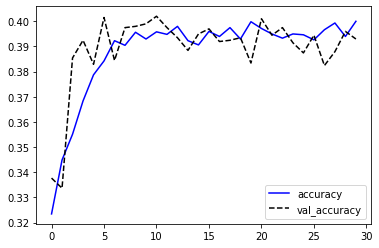

In [ ]:
plt.plot(history.history['accuracy'], 'b-', label = 'accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label = 'val_accuracy')
plt.legend()
plt.show()

## MountainCar-v0 환경에서 이 신경망이 정해주는 행동으로 에이전트를 움직여 보겠습니다. 

In [ ]:
# 우선 간단하게 신경망을 통과한 예측값을 출력하여 보겠습니다. 
logit = model.predict(np.expand_dims(previous_obs, axis = 0))[0]
print(logit)
# 결과로 출력된 값은 세 가지 행동에 대한 확률값을 출력하고 있습니다. 

[0.2682326  0.30129227 0.4304751 ]


In [ ]:
# 이 중 가장 높은 값을 뽑아내여 행동을 취할 수 있도록 합니다.  
action = np.argmax(logit)
print("pred_action : ", action)

pred_action :  2


In [ ]:
# env.step() 를 사용하여 행동을 전할한 후 의 결과를 확인합니다. 
obs, reward, done, info = env.step(action)
print("obs : ", obs)
print("reward : ", reward)
print("done : ", done)

obs :  [0.58183941 0.04682356]
reward :  -1.0
done :  True


## 다음은 이를 반복하여 움직일 수 있도록 구현하겠습니다.

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 에피소드를 반복하며 얻을 수 있는 유의미한 정보를 
# 저장하기 위한 빈 리스트를 정의합니다. 

scores  = []
steps   = []
actions = []

# 학습 결과를 시각화 하기 위한 환경을 정의합니다. 
env = wrap_env(gym.make('MountainCar-v0'))

# 100번의 에피소드가 진행될 수 있게끔 반복문 구조를 선언합니다. 
for i in range(500):
    # 진행상황을 알려주는 조건문 코드를 작성하여 줍니다. 
    if i % 1 == 0:
        print("Now episode : ", i)
    
    # 초기 스코어, 스텝, 환경 값 초기화 
    score = 0
    step = 0
    previous_obs = []
    env.reset()

    # break문이 걸릴 때 까지 스텝을 반복할 수 있도록 합니다. 
    while True:
        # previous_obs의 저장 결과가 아무것도 없을때 
        # 즉 첫 번째 행동은 
        if len(previous_obs) == 0:
            # 무작위 행동을 수행할 수 있도록 합니다. 
            action = env.action_space.sample()
        
        # 다음은 len(previous_obs)의 값이 0이 아닌 경우
        # 즉, 한번의 행동을 수행하였다면 
        else:
            # 신경망을 통해 행동을 수행하도록 합니다. 
            # 신경망은 위치, 상태 두 가지 결괏값을 받기에 previous_obs를 가지고 
            # 예측을 수행하여 줍니다. 
            logit = model.predict(np.expand_dims(previous_obs, axis = 0))[0]
            # 예측된 결과는 행동의 확률값이기에, np.argmax() 함수를 통해 가장 높은 결괏값을 
            # 행동으로 뽑아주도록 합니다. 
            action = np.argmax(logit)
            # 그리고 이 행동 정보는 따로 저장하여 주도록 하겠습니다. 
            actions.append(action)
        
        # 행동한 결과를 step()에 할당하여 
        # 환경, 보상, 종료여부 등을 업데이트 합니다. 
        obs, reward, done, info = env.step(action)
        # 환경(obs)의 정보를 previous_obs에 저장하여 줍니다.  
        previous_obs = obs
        # 보상 정보를 score 변수에 저장하여 줍니다. 
        score += reward
        # 한 번의 행동을 수행하였으니 스텝 정보에도 1을 더하여 주겠습니다. 
        step += 1

        # 종료여부가 True라면 break를 걸어 
        # 스텝을 종료하고 에피소드를 멈추도록 합니다. 
        if done:
            break
    
    # 에피소드마다의 결과와 스텝 정보를 따로 저장하여 주겠습니다.       
    scores.append(score)
    steps.append(step)
    
    # 에피소드가 종료될 때 마다의 결과를 출력하여 주겠습니다. 
    print("scores : ", scores[i])
    print("steps : ", steps[i])

# 환경을 종료합니다. 
env.close()

Now episode :  0


NameError: ignored

In [ ]:
# 에피소드별 스코어값의 평균을 출력해 보겠습니다.
print(np.mean(scores))

-147.974


# 결과값을 시각화하여 출력해보도록 하겠습니다. 
# 시각화 대상은 에피소드별 스코어 값과 
# 에피소드 별 스텝값입니다. 

In [ ]:
import warnings
warnings.filterwarnings(action='ignore')

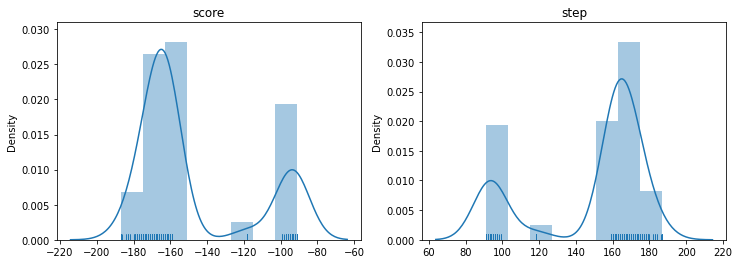

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].set_title('score')
ax[1].set_title('step')
sns.distplot(scores, rug=True, ax=ax[0])
sns.distplot(steps, rug=True, ax=ax[1])
plt.show()

## 예전의 결과는 -200에 큰 비중이 분포되어 있었는데,
## 여기서는 전체적으로 값이 퍼져 있는 것을 확인할 수 있습니다. 
---
---
## 그리고 스코어 값이 -200이 나오는 경우는 거의 보이지 않는데, 
## 이는 에이전트가 200스텝 안에 깃발에 도달하는 확률이 매우 높다는 뜻이죠.

## step 그래프에서도 80 ~ 120, 150 정도의 값들이 큰 비중을 차지하고 있습니다.
## 이렇게 score 그래프와 step 그래프는 대칭되는 결과를 확인할 수 있습니다.

## 그리고 score의 평균값도 기존의 -199 정도의 결과에 비해 
## 크게 상승한 것을 확인할 수 있습니다.

## 다음은 행동 결과의 분포를 시각화 하는 과정입니다. 

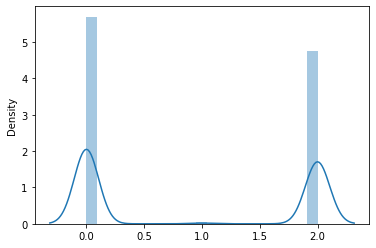

In [ ]:
sns.distplot(actions)
plt.show()

## 결과값을 확인해 보면 정지하는 경우(1)는 거의 없고 
## 대부분 왼쪽이나 오른쪽으로 이동하는 것을 확인할 수 있습니다.
## 그리고 에이전트는 일반적인 평지를 달리는 것이 아닌
## 가속도를 받아서 언덕을 올라가기 위한 행동을 확인할 수 있습니다.  

# 영상으로 확인해 보도록 하겠습니다. 

In [ ]:
# 학습된 결과를 영상으로 출력하여 보겠습니다. 
show_video()

# 큐러닝(Q-Learning) / 1. 연속 환경에서 회귀 신경망으로 풀어보기.

## 앞에서 시도한 방법은 신경망을 사용하긴 했지만 
## 강화학습의 이론을 사용하진 않았었습니다. 

## 이번에는 강화학습의 대표적인 방법론인 Q-Learning을 사용해보겠습니다.

## 이전의 **행동 공간은 이산적**이었습니다. 
## 예를들면 행동을 선택할 때 **0,1,2 와 같은 값을 선택**하였다는 겁니다.   
---
---
## 이번엔 행동 공간이 연속적인 환경을 만들어보겠습니다. 
## 예를들면 행동을 선택할 때 0.56213, -0.312와 같은 
## 연속적인 값을 선택해야 한다는 것이죠.


In [ ]:
import gym

In [ ]:
# 연속적인 환경을 의미하는 환경을 만들어 줍니다. 
env = gym.make('MountainCarContinuous-v0')

## 관찰 공간은 일반 mountaincar와 동일하지만
## 행동 공간은 관찰 공간 처럼 Box 형태의 범위가 됩니다. 
## 최솟값은 -1, 최댓값은 1이며
## 이 사이의 값을 지정해서 에이전트를 왼쪽이나 오른쪽으로 움직일 수 있습니다. 
## 행동의 절댓값이 클수록 에이전트는 큰 힘을 받게 됩니다.
---
## 또한 최대 시간 단위는 200에서 999로 늘어났습니다. 

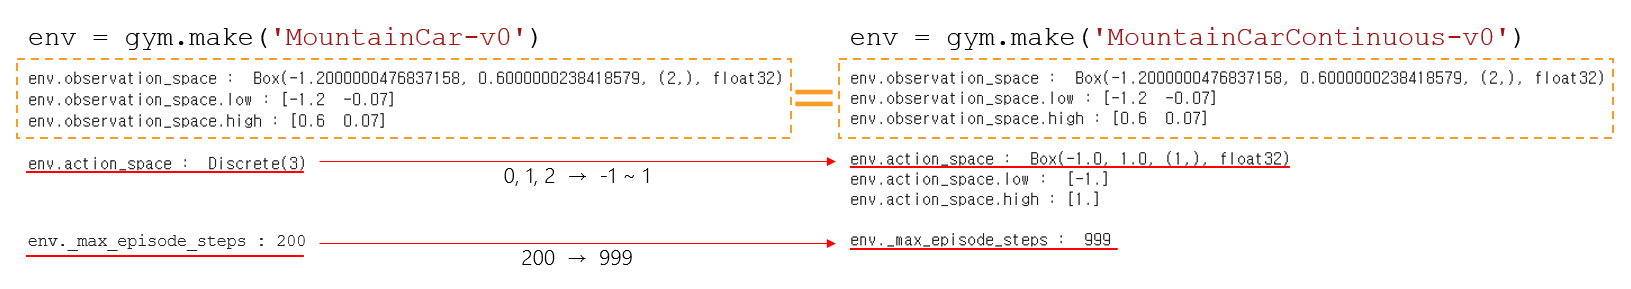

In [ ]:
print("env.observation_space : ", env.observation_space)
print("env.observation_space.low :", env.observation_space.low)
print("env.observation_space.high :",env.observation_space.high)
print()
print("env.action_space : ", env.action_space)
print("env.action_space.low : ", env.action_space.low)
print("env.action_space.high :", env.action_space.high)
print()
print("env._max_episode_steps : ", env._max_episode_steps)

env.observation_space :  Box(-1.2000000476837158, 0.6000000238418579, (2,), float32)
env.observation_space.low : [-1.2  -0.07]
env.observation_space.high : [0.6  0.07]

env.action_space :  Box(-1.0, 1.0, (1,), float32)
env.action_space.low :  [-1.]
env.action_space.high : [1.]

env._max_episode_steps :  999


## 새로운 환경을 파악하기 위해 랜덤 행동 에이전트를 실행해보겠습니다.

In [ ]:
# 환경 및 스코어, 스텝을 초기화 합니다. 
env.reset()
score = 0
step = 0

# 200번 정도의 스텝(행동)을 수행하며 행동에 따른 결과를 확인해 보겠습니다. 
# 혹은 1번의 스텝을 가지고 결과를 확인해 보세요.

for i in range(200):
    action = env.action_space.sample()
    #print("action : ", action)
    obs, reward, done, info = env.step(action)
    #print("obs", obs)

    previous_obs = obs
    score += reward
    step += 1

    if done:
        break
        
print("score : ", score, "step :", step)

score :  -6.180475912553303 step : 200


## 스코어 값은 약 -6 ~ -7 정도의 값이 출력되었습니다. 
---

## MountainCarContinuous-v0 에서 각 스텝마다 얻는 보상은 
## 행동의 제곱에 0.1을 곱한 값의 음수 입니다. 
# $$ reward(action) = -(action × action)×0.1$$

## 예를들어 0.63722646 의 값을 갖는 행동을 하였다 가정한다면 
## 0.63722646 값의 제곱에 0.1을 곱하고, 그 값을 음수로 취하게 되면 
## -0.04060575613241317 의 값이 출력되어 집니다. 
---
---
## 즉 **큰 힘으로 움직일수록 음의 보상을 더 많이 받게 됩니다**.
## 그러니 **불필요한 큰 행동은 최소화**해야 하는 것이죠.

## 또한 **깃발에 도달하면 +100의 보상**을 얻고, **움직이지 않으면 0의 보상**을 받습니다. 
## 이 문제의 보상함수는 이전 MountainCar-v0 보다 좀 더 까다롭습니다. 


## 그렇다면 만약 최대 스텝 수인 999회까지 행동을 수행하였을 때의 
## 보상은 어떨까요?

In [ ]:
env.reset()
score = 0
step = 0
    
while True:
    action = env.action_space.sample()
    obs, reward, done, info = env.step(action)

    previous_obs = obs
    score += reward
    step += 1

    if done:
        break
        
print("score : ", score, "\n step : ", step)

score :  -34.15564304299129 
 step :  999


## 오히려 결과는 더 좋아지지 않습니다. 
---
## 그래서 이번 환경에서도 신경망을 사용하게 되었을 때 
## 과연 문제를 풀 수 있는지 확인하여 보겠습니다. 

In [ ]:
# 우선 학습할 수 있는 데이터를 생성하는 과정입니다. 
# 우리가 수집할 데이터는 무작위로 행동하는 과정에서 
# 앞으로 조금이나마 가는 경우에 대한 데이터(input -> [위치, 속도], output -> [행동])를 
# 저장하여 줍니다.  

# 에피소드별 스코어 값들을 저장하는 변수   
scores = []
# 조금이나마 앞으로 간 경우의 신경망 학습에 필요한 데이터를 저장하는 변수
training_data = []
# required_score 값 보다 높은 스코어를 담는 변수. 
accepted_scores = []
# 조금 앞으로 가게 되었을 때의 기준 스코어값.
required_score = -198

# 10,000번의 에피소드를 진행하여 줍니다. 
for i in range(10000):

    # 현재 진행상황을 출력합니다. 
    if i % 100 == 0:
        print("Now Episode : ", i)
    
    # 환경, 보상, 스텝당 정보, 환경 정보를 초기화 합니다. 
    env.reset()
    score = 0
    step = 0
    game_memory = []
    previous_obs = []


    # 이전과 비슷한 조건으로 풀기위해 최대 시간 단위를 200스텝으로 제한하였습니다.
    for j in range(200):
        # 에피소드별 행동은 무작위 행동을 수행하도록 합니다. 
        action = env.action_space.sample()
        # 무작위 행동으로 인한 환경, 보상, 종료 여부 등의 결과를 저장합니다. 
        obs, reward, done, info = env.step(action)
        
        # 다음은 게임 정보를 저장하기 위한 코드입니다. 
        # 저장되는 정보는 환경변수(위치,속도), 행동 입니다.
        if len(previous_obs) > 0:
            game_memory.append([previous_obs, action])
        
        previous_obs = obs
        
        # 보상함수는 단순하게 다시 재설정하였습니다.
        # 한 번의 스텝당 obs[0](위치)가 -0.2 이상 전진하였을 때 1점을, 
        if obs[0] > -0.2:
            reward = 1
        # 그렇지 않는다면 스텝당 -1 의 보상을 받도록 합니다.  
        else:
            reward = -1
        
        score += reward
        step += 1

        # 종료여부를 확인하고 참인경우 반복문 종료를 수행합니다. 
        if done:
            break

    # 각각의 에피소드 스텝을 모두 수행한 후 
    # score값을 scores변수에 따로 저정합니다. 
    scores.append(score)
    # 그리고 각 에피소드의 score 값이 required_score(-198)보다 큰 경우 
    # 즉, 조금이라도 앞으로 간 경우라면 
    if score > required_score:

        # 그 결과를 출력하며, 
        print("Episode : {}, Score : {}".format(i, score))

        # 점수는 따로 accepted_scores변수에 저장하고,  
        accepted_scores.append(score)

        # 환경정보(previous_obs(위치, 속도)), 행동(action) 정보도 
        # training_data 변수에 저장하여 줍니다.
        # 즉 학습을 위한 데이터를 저장하는 과정입니다.
        for data in game_memory:
            training_data.append(data)

Now Episode :  0
Now Episode :  100
Now Episode :  200
Episode : 210, Score : -174
Now Episode :  300
Episode : 348, Score : -190
Now Episode :  400
Now Episode :  500
Episode : 570, Score : -174
Now Episode :  600
Now Episode :  700
Episode : 709, Score : -170
Now Episode :  800
Now Episode :  900
Now Episode :  1000
Episode : 1029, Score : -176
Now Episode :  1100
Now Episode :  1200
Episode : 1262, Score : -190
Now Episode :  1300
Episode : 1340, Score : -186
Now Episode :  1400
Episode : 1466, Score : -172
Now Episode :  1500
Episode : 1546, Score : -182
Now Episode :  1600
Episode : 1686, Score : -184
Now Episode :  1700
Now Episode :  1800
Episode : 1860, Score : -188
Now Episode :  1900
Now Episode :  2000
Episode : 2069, Score : -182
Now Episode :  2100
Now Episode :  2200
Now Episode :  2300
Now Episode :  2400
Episode : 2415, Score : -176
Now Episode :  2500
Episode : 2565, Score : -178
Now Episode :  2600
Now Episode :  2700
Episode : 2740, Score : -180
Episode : 2757, Score

scores.mean() :  -199.8346
accepted_scores :  [-174, -190, -174, -170, -176, -190, -186, -172, -182, -184, -188, -182, -176, -178, -180, -182, -168, -160, -184, -176, -178, -176, -188, -194, -174, -182, -186, -184, -184, -180, -186, -172, -166, -190, -182, -176, -176, -188, -168, -188, -190, -154, -178, -180, -196, -176, -194, -186, -158, -192, -174, -192, -196, -194, -184, -182, -194, -188, -168, -180, -176, -188, -190, -180, -186, -190, -176, -176, -170, -176, -178, -174, -182, -184, -166, -188, -184, -176, -176, -180, -142, -184, -178]


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


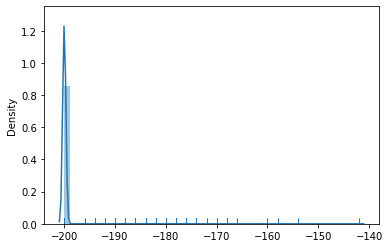

In [ ]:
# 다음은 결과를 시각화 하는 과정입니다.
scores = np.array(scores)
print("scores.mean() : ", scores.mean())
print("accepted_scores : ", accepted_scores)

import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(scores, rug=True)
plt.show()

## 대부분 -200의 결과에 분포되고 있습니다. 
## 무작위 행동을 수행한 것이기에 
## 앞으로 나아간 경우가 다소 드물다는 것이죠.  

## 그럼 앞으로 조금 나아간 경우의 학습데이터로 저장된 결과를 
## 일부 확인해 보도록 하겠습니다. 

In [ ]:
training_data[:5]
# 출력된 결과는 두 가지로, 
# 첫 번째는 '위치와 속도', 두 번째는 '행동'이 되겠습니다. 

[[array([-4.39403384e-01, -1.23111347e-04]),
  array([0.6698615], dtype=float32)],
 [array([-4.39146476e-01,  2.56908634e-04]),
  array([-0.13696599], dtype=float32)],
 [array([-0.43972165, -0.00057518]), array([-0.16533782], dtype=float32)],
 [array([-0.4411673 , -0.00144565]), array([-0.9195388], dtype=float32)],
 [array([-0.44460421, -0.00343691]), array([0.7549855], dtype=float32)]]

In [ ]:
# 신경망에게 들어갈 독립변수와 종속변수를 구분하여 저장하겠습니다. 
train_X = np.array([i[0] for i in training_data]).reshape(-1, 2)
train_Y = np.array([i[1] for i in training_data]).reshape(-1, 1)
print("train_X.shape : ", train_X.shape)
print("train_X : \n", train_X[:3])
print()
print("train_Y.shape : ", train_Y.shape)
print("train_Y : \n", train_Y[:3])

train_X.shape :  (16517, 2)
train_X : 
 [[-4.39403384e-01 -1.23111347e-04]
 [-4.39146476e-01  2.56908634e-04]
 [-4.39721654e-01 -5.75178102e-04]]

train_Y.shape :  (16517, 1)
train_Y : 
 [[ 0.6698615 ]
 [-0.13696599]
 [-0.16533782]]


In [ ]:
# 이제 학습에 쓰일 회귀 모델을 정의하겠습니다.
# 회귀 모델을 사용하는 이유는 출력 레이어의 결괏값이 행동인데,
# 이번 환경의 행동값은 연속형 값이기에 
# 회귀모델을 구현하였으며,  
# 출력을 그대로 내보내는 linear 활성화 함수를 사용하여 줍니다. 
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 128, input_shape=(2,), activation='elu'),
    tf.keras.layers.Dense(units = 32, activation='elu'),
    tf.keras.layers.Dense(units = 1, activation='linear')
])

model.compile(optimizer=tf.optimizers.Adam(), loss='mse')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               384       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 4,545
Trainable params: 4,545
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(train_X, train_Y, epochs=10, validation_split=0.25)

Train on 12387 samples, validate on 4130 samples
Epoch 1/10
12387/12387 [==============================] - 1s 92us/sample - loss: 0.3363 - val_loss: 0.3309
Epoch 2/10
12387/12387 [==============================] - 1s 52us/sample - loss: 0.3327 - val_loss: 0.3277
Epoch 3/10
12387/12387 [==============================] - 1s 51us/sample - loss: 0.3321 - val_loss: 0.3290
Epoch 4/10
12387/12387 [==============================] - 1s 51us/sample - loss: 0.3319 - val_loss: 0.3271
Epoch 5/10
12387/12387 [==============================] - 1s 51us/sample - loss: 0.3316 - val_loss: 0.3269
Epoch 6/10
12387/12387 [==============================] - 1s 51us/sample - loss: 0.3320 - val_loss: 0.3282
Epoch 7/10
12387/12387 [==============================] - 1s 51us/sample - loss: 0.3311 - val_loss: 0.3266
Epoch 8/10
12387/12387 [==============================] - 1s 51us/sample - loss: 0.3319 - val_loss: 0.3361
Epoch 9/10
12387/12387 [==============================] - 1s 51us/sample - loss: 0.3314 - val_l

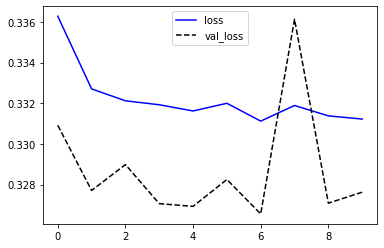

In [ ]:
plt.plot(history.history['loss'], 'b-', label = 'loss')
plt.plot(history.history['val_loss'], 'k--', label = 'val_loss')
plt.legend()
plt.show()

## val_loss가 더 이상 감소하지 않기 때문에 과적합을 피하기 위해 
## 너무 많은 에폭값을 주지 않겠습니다.
## 대체로 결괏값이 0.33 정도의 값을 보여주고 있는데, 
## 이는 학습이 잘 된 것이라 간주하기 어렵습니다. 
---
---
## 그럼 신경망으로 에이전트의 행동을 예측하는 과정을 
## 수행해보도록 하겠습니다. 

In [ ]:
scores = []
steps = []
actions = []

# 총 500번의 에피소드를 반복하여 줍니다. 
for i in range(500):

    # 에피소드 별 진행상황을 출력하여 줍니다. 
    if i % 10 == 0:
        print('Now Episode: {}, mean score: {}, mean step: {}'.format(i,np.mean(scores[-100:]), np.mean(steps[-100:])))

    # 에피소드가 반복될 때 마다 각 지표를 초기화 하여 줍니다. 
    score = 0
    step = 0
    previous_obs = []
    env.reset()

    # 999번의 스텝을 수행하여 줍니다.
    while True:
        # 첫 번째 행동은 무작위 행동을 수행하여 줍니다. 
        if len(previous_obs) == 0:
            action = env.action_space.sample()

        # 두 번째 행동부터는 previous_obs(위치, 속도)를 신경망 모델에 넣어 예측된 결과를 
        # 행동으로 하여 줍니다.  
        else:
            action = model.predict(np.expand_dims(previous_obs, axis=0))[0]
            actions.append(action)
        
        # 행동 결과를 환경에 반영하여 줍니다.
        obs, reward, done, info = env.step(action)
        previous_obs = obs
        score += reward
        step += 1

        if done:
            break
    
    scores.append(score)
    steps.append(step)

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


Now Episode: 0, mean score: nan, mean step: nan
Now Episode: 10, mean score: -1.367044342711779, mean step: 999.0
Now Episode: 20, mean score: -1.3949696387980546, mean step: 999.0
Now Episode: 30, mean score: -1.3758525384228046, mean step: 999.0
Now Episode: 40, mean score: -1.3431897057458984, mean step: 999.0
Now Episode: 50, mean score: -1.3442517868297785, mean step: 999.0
Now Episode: 60, mean score: -1.3178198428419898, mean step: 999.0
Now Episode: 70, mean score: -1.3278537457254032, mean step: 999.0
Now Episode: 80, mean score: -1.341114575028438, mean step: 999.0
Now Episode: 90, mean score: -1.3201148028385423, mean step: 999.0
Now Episode: 100, mean score: -1.2958963323502055, mean step: 999.0
Now Episode: 110, mean score: -1.2586488264115496, mean step: 999.0
Now Episode: 120, mean score: -1.216214200056686, mean step: 999.0
Now Episode: 130, mean score: -1.2068482357346253, mean step: 999.0
Now Episode: 140, mean score: -1.216481677312056, mean step: 999.0
Now Episode: 

## 평균 스코어값은 점차 나아진 것 같지만 평균 step은 계속해서 999에 머무르고 있습니다. 
## 이는 깃발에 도달하지 못하고 있다는 것이죠.

In [ ]:
print(np.mean(scores))

-1.208725839563218


## 에이전트의 행동을 좀 더 자세하게 파악하기 위하여 스코어와 스텝의 분포를 확인해 보니 
## 에이전트는 목적지에 도달하지 못한 것을 파악할 수 있습니다.

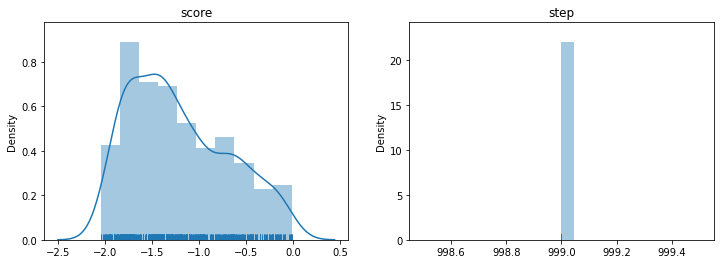

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].set_title('score')
ax[1].set_title('step')
sns.distplot(scores, rug=True, ax=ax[0])
sns.distplot(steps, rug=True, ax=ax[1])
plt.show()

## 또 에이전트의 행동을 그래프로 그려본 결과 
## 행동 범위가 -1 ~ 1 사이이지만 
## 대체로 0 부근으로 값이 분포하고 있다는 것을 알 수 있습니다. 
## 이는 깃발을 향하여 정확하게 움직이고 있다 볼 수 없겠네요. 

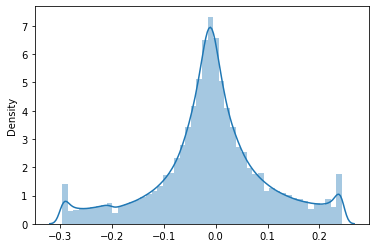

In [ ]:
sns.distplot(actions)
plt.show()

In [ ]:
# 다시한번 신경망 예측을 통해 입력값에 따른 움직임을 예측하고, 
# 이를 영상으로 출력해보도록 하겠습니다.  

# 이전 환경 닫기
env.close()
# 새로운 환경 정의
env = wrap_env(gym.make('MountainCarContinuous-v0'))
# 환경 리셋
env.reset()

score = 0
step = 0
previous_obs = []

while True:
    if len(previous_obs) == 0:
        action = env.action_space.sample()
    else:
        action = model.predict(np.expand_dims(previous_obs, axis=0))[0]
    
    obs, reward, done, info = env.step(action)
    previous_obs = obs
    score += reward
    step += 1
    
    if done:
        break

print('score:', score)
print('step:', step)

env.close()
show_video()

score: -1.5967370592086267
step: 999


## 에피소드가 진행되는 동안 에이전트는 처음에 조금씩 움직이다가
## 점차 가속도를 받아 더 많이 움직이게 됩니다. 

## 하지만 에피소드가 끝날 때 까지 결국 깃발에 도착하지는 못하고 있습니다. 

---
---
## 지금까지 살펴본 바 회귀 신경망으로 이 문제를 푸는 데는 
## 한계가 있다는 것을 확인하였습니다.

## 주어진 환경에 대해서 적절한 행동을 찾아내지 못하였기 때문이죠.

## 그래서 이번에는 Q-Learning을 통해 문제를 풀어보겠습니다. 


# 큐러닝(Q-Learning) / 2. 연속 환경에서 큐 러닝으로 풀어보기.

## 큐러닝은 관찰 상태에서 취할 수 있는 모든 행동의 Q값을 학습하는 방법입니다. 
## 여기서 **Q값이란 Quality의 약자**입니다.
## **특정 상태에서 어떤 행동의 Q값**이 다른 행동보다 높다면 
## **Q값이 높은 행동을 우선적으로 선택**하게 됩니다. 

## 가장 높은 Q값을 가진 행동을 선택할 수도 있고, 
## 소프트맥스 함수로 각 Q값을 입력으로 삼아 확률을 기반으로한 행동을 
## 선택할 수도 있습니다. 
## 이 경우 **Q값이 높으면 당연히 선택될 확률이 높아지는 것**이죠. 

## 모든 상태에 대한 모든 행동의 Q값을 구하면 테이블 형태의 데이터를 얻게 됩니다. 
## 이를 큐 테이블(Q-Table) 이라고 하죠.
## 이 큐테이블을 학습시키는 과정이 '큐러닝'입니다.
## 큐 테이블을 학습시키는 방법에 대한 이론은 잠시 뒤에서 설명을 드리도록 
## 하겠습니다.

---
---


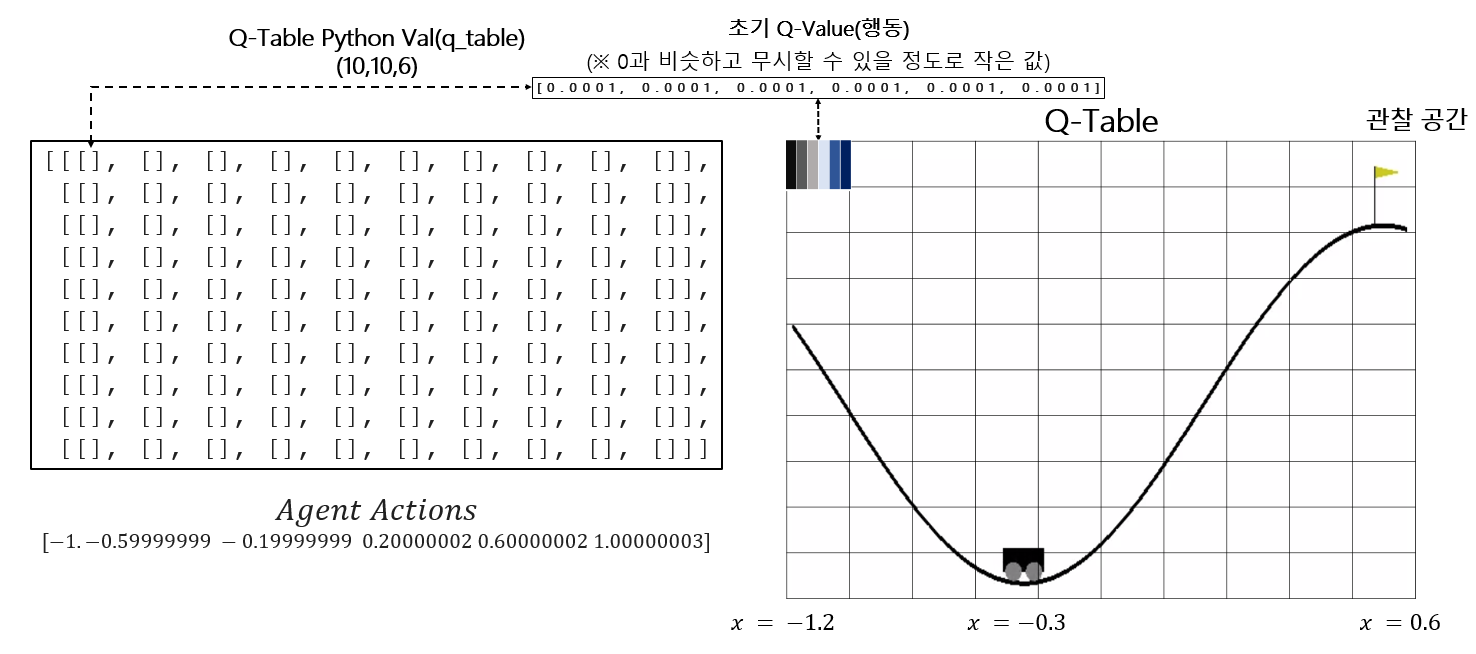


## 그런데 우리가 지금 풀고 있는 환경(MountainCarContinuous-v0)은 연속적인 값을 가지고 있기에, 
## 모든 값에 대한 Q값을 계산하는 것은 쉽지 않은 일입니다. 

## 이러한 경우 행동 공간을 일정한 간격의 격자(Grid)로 나눠서 해당 격자에 대한
## Q값을 계산하는 방식을 채택할 수 있습니다. 

## 또 관찰 공간도 연속적이기 때문에 마찬가지로 격자로 나눠 해당 격자에 대한 Q값을 
## 저장합니다. 

In [ ]:
state_grid_count  = 10
action_grid_count = 6

q_table = []

for i in range(state_grid_count):
    q_table.append([])
    # 출력 결과 / (10, 0)
    # [[], [], [], [], [], [], [], [], [], []]
    for j in range(state_grid_count):
        q_table[i].append([])
        # 위 빈 공간에 다시한번 10개의 빈 리스트를 할당합니다. 
        # 출력 결과 / (10, 10, 0)
        # [[[], [], [], [], [], [], [], [], [], []],
         # [[], [], [], [], [], [], [], [], [], []],
         # [[], [], [], [], [], [], [], [], [], []],
         # [[], [], [], [], [], [], [], [], [], []],
         # [[], [], [], [], [], [], [], [], [], []],
         # [[], [], [], [], [], [], [], [], [], []],
         # [[], [], [], [], [], [], [], [], [], []],
         # [[], [], [], [], [], [], [], [], [], []],
         # [[], [], [], [], [], [], [], [], [], []],
         # [[], [], [], [], [], [], [], [], [], []]]
        for k in range(action_grid_count):
            q_table[i][j].append(0.1)
            # 출력 결과 / (10, 10, 6)
            # 위 빈 리스트에 0.0001 의 값이 6번 들어가게 됩니다.


## q_table 변수에는 앞서 이야기한 3차원 큐테이블을 생성하여 저장해주도록 합니다.
## 관찰 공간은 2차원이고, 그 안에 모든 행동의 Q값을 넣어야 하기 때문에
## 3차원 큐 테이블을 생성해야 하죠. 

## 관찰 공간은 각각 10개씩의 격자로 나눴고 행동 공간은 6개의 격자로 나눴습니다.
## 관찰 공간의 크기는 10 × 10 = 100이 되고 행동은 6개이기 때문에 
## 큐테이블에 저장되는 Q값은 총 600개가 됩니다. 

In [ ]:
# q_table

## 처음에는 각 행동의 Q값이 어떤지 알 수 없기 때문에 초기화 과정을 거쳐야 합니다.
## 기본값으로는 0과 비슷하고 무시할 수 있을 정도로 
## 작은 값인 0.0001을 넣어주도록 하겠습니다. 

## 모두 같은 값을 넣어주기 때문에 처음에는 에이전트가 큐테이블을 참조해도 
## 랜덤한 행동이 선택되어 집니다.

## 그리고 해당 행동이 효과적이지 않다고 판단되어 Q값이 조금 떨어지게 되면 
## 나머지 Q값이 그대로 유지되고 있기 때문에 다른 행동으로 탐색할 확률이 증가할 것입니다. 
## 초기 Q값을 높게 줄수록 처음에 시도했던 행동이 효과적이지 않을 때 
## 다른 행동을 탐색해볼 확률이 높아집니다. 

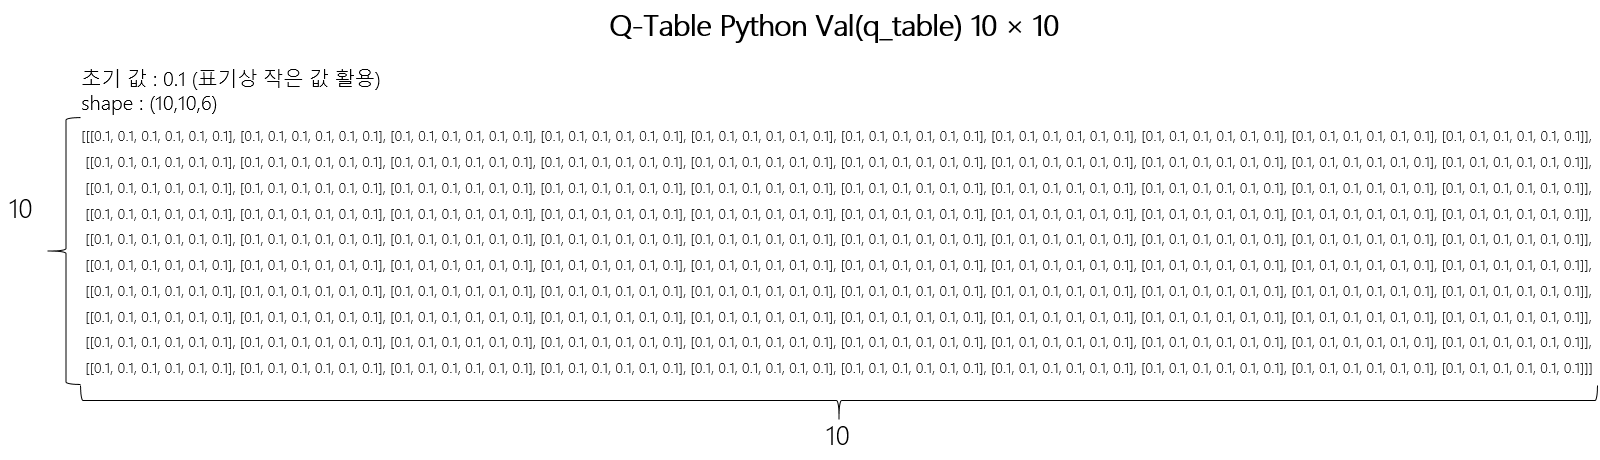

## 행동은 -1과 1 사이의 6개 값이 출력됩니다. 
## 마지막 값은 1을 살짝 넘지만 환경의 step() 함수에서 모든 행동 값을 -1 이상 
## 1 이하로 바꿔주기 때문에 문제가 되지는 않습니다. 


In [ ]:
# 다음은 행동을 다시 재정의 하는 과정입니다.
# 우선 관찰 공간은 연속형임을 고려한다면 행동 또한 연속형일 수 밖에 없습니다.  
# 그렇기에 이를 간소하게 표현하고자 관찰 공간을 격자형으로 q-table을 만들었고,
# 이에 맞게 하나의 격자에 실수형 범위를 6개의 일정 간격으로 나눠주는 과정을 수행하여 주겠습니다.    

actions = range(action_grid_count)
actions = np.array(actions).astype(float)
# 6개의 행동으로 나누는 과정입니다.
print("actions : ", actions)

# env.action_space.high =  1
# env.action_space.low  = -1
# action_grid_count     =  6
# 행동 공간의 합을 6으로 만들어 주기 위한 상수 k를 구하는 과정.
k = (env.action_space.high - env.action_space.low) / (action_grid_count - 1) 
print("k : ", k)

actions *= k
print("actions : ", actions)

# 그리고 행동 공간의 값의 범위를 -1 ~ 1 사이로 만들어 주기 위한 과정을 수행합니다. 
actions += env.action_space.low

print("actions : ", actions)

actions :  [0. 1. 2. 3. 4. 5.]
k :  [0.4]
actions :  [0.         0.40000001 0.80000001 1.20000002 1.60000002 2.00000003]
actions :  [-1.         -0.59999999 -0.19999999  0.20000002  0.60000002  1.00000003]


## 이제 큐 러닝 에이전트를 학습시키기 전에 학습에 사용되어지는 
## 2개의 함수를 정의하여 보겠습니다. 

In [ ]:
import random

## obs_to_state() 함수는 관찰 상태를 각 격자에 배당합니다. 
## 예를 들어, 관찰 공간의 한 점을 obs_to_state()함수에 넣으면 격자의 인덱스를 반환합니다. 

In [ ]:
sample = env.observation_space.sample()
# 연속 값을 갖는 경우의 초기값 범위는 -1.2 ~ 0.6 까지 다양하게 갖습니다. 
print("sample : ", sample)

# 데이터 처리를 더 쉽게 해주기 위해 2차원 데이터를 1차원으로 펼쳐줍니다.  
obs = sample.flatten()
print("obs : ", obs)

# env ↓
# [위치, 속도]
# [-1.2 , -0.07]
# [0.6  ,  0.07]
low = env.observation_space.low 
print("low : " , low)

high = env.observation_space.high
print("high : ", high)

    
# 위치와 속도를 0 ~ 1 사이의 값으로 맞추기 위한 과정을 수행하여 줍니다.
# 그리고 현재 반환되어지는 값은 10 × 10 크기의 관찰 공간이므로
# 관찰 크기 공간(state_grid_count)을 곱하여 주겠습니다.
print("(obs - low) : ", (obs - low))
print("(high - low) : ", (high - low))
idx = (obs - low) / (high - low) 
print("(obs - low) / (high - low) : ", idx)

idx = (obs - low) / (high - low) * state_grid_count
print("idx : ", idx)

idx = [int(x) for x in idx]

print(idx)

sample :  [-0.6385336  -0.05051774]
obs :  [-0.6385336  -0.05051774]
low :  [-1.2  -0.07]
high :  [0.6  0.07]
(obs - low) :  [0.56146646 0.01948226]
(high - low) :  [1.8000001 0.14     ]
(obs - low) / (high - low) :  [0.3119258  0.13915902]
idx :  [3.119258  1.3915902]
[3, 1]


## 위 과정을 함수로 표현하면 아래와 같이 나타낼 수 있습니다.

In [ ]:
def obs_to_state(env, obs):
    obs = obs.flatten()
    
    # env ↓
    # [위치, 속도]
    # [-1.2 , -0.07]
    # [0.6 , 0.07]
    low = env.observation_space.low 
    high = env.observation_space.high
    
    # 위치와 속도를 0 ~ 1 사이의 값으로 맞추기 위한 과정을 수행하여 줍니다.
    # 그리고 현재 반환되어지는 값은 10 × 10 크기의 관찰 공간이므로
    # 관찰 크기 공간(state_grid_count)을 곱하여 주겠습니다. 
    idx = (obs - low) / (high - low) * state_grid_count
    idx = [int(x) for x in idx]
    return idx

# 활성화 함수 softmax()를 간단하게 정의하는 과정입니다. 
def softmax(logits):
    exp_logits = np.exp(logits - np.max(logits))
    sum_exp_logits = np.sum(exp_logits)
    return exp_logits / sum_exp_logits

In [ ]:
sample = env.observation_space.sample()
grid = obs_to_state(env, sample)

print("sample : ", sample)
print("grid : ", grid)

sample :  [-0.68714327  0.04629256]
grid :  [2, 8]


## 다음은 학습에 사용되어지는 Q-Learning의 코드입니다.
## 강화학습에서 가장 많이 사용되어지는 방법 중 하나는 
## **'epsilon - greedy policy '** 입니다.  

## **엡실론 탐욕 정책** 은 '엡실론' 이라는 값 보다 
## 난수가 작을 때는 랜덤한 행동을 사용하고, 
## 그렇지 않으면 지금까지 찾은 것 중에서 가장 좋은 방법을 선택하게 됩니다. 
---
---
## 즉, 처음에는 에이전트가 다양한 행동을 시도하는 탐색(Exploration)을 하고, 
## 나중에는 지금까지 찾아낸 행동 중 최적의 행동을 이용(exploitation)하는 방법입니다. 

## 여기서 엡실론 값은 처음에는 큰 값으로 설정하고 학습을 지속함에 따라 점점 작아지도록 설정하죠. 

## 그럼 처음에는 무작위 행동을 통해 환경을 탐색하고, 엡실론값이 적당하게 작아지게 되면 대부분의 행동은 최적의 행동을 이용하고, 
## 가끔씩 무작위 행동을 수행하게 됩니다. 

## 이 부분을 코드로 구현하면 다음과 같습니다.

In [ ]:
epsilon = 1.0 

for i in range(50): 
    epsilon *= 0.9
    # 엡실론 값이 일정 값 이하로 내려가지 못하게 함으로써 
    # 이후 모든 행동이 무조건 '이용'만 하지 못하도록 합니다. 
    epsilon = max(epsilon_min, epsilon)
    print(i ,epsilon)

0 0.9
1 0.81
2 0.7290000000000001
3 0.6561000000000001
4 0.5904900000000002
5 0.5314410000000002
6 0.47829690000000014
7 0.43046721000000016
8 0.38742048900000015
9 0.34867844010000015
10 0.31381059609000017
11 0.28242953648100017
12 0.25418658283290013
13 0.22876792454961012
14 0.2058911320946491
15 0.1853020188851842
16 0.16677181699666577
17 0.1500946352969992
18 0.13508517176729928
19 0.12157665459056936
20 0.10941898913151243
21 0.0984770902183612
22 0.08862938119652508
23 0.07976644307687257
24 0.07178979876918531
25 0.06461081889226679
26 0.05814973700304011
27 0.0523347633027361
28 0.04710128697246249
29 0.042391158275216244
30 0.03815204244769462
31 0.03433683820292516
32 0.030903154382632643
33 0.02781283894436938
34 0.025031555049932444
35 0.0225283995449392
36 0.020275559590445278
37 0.01824800363140075
38 0.016423203268260675
39 0.014780882941434608
40 0.013302794647291147
41 0.011972515182562033
42 0.01077526366430583
43 0.01
44 0.01
45 0.01
46 0.01
47 0.01
48 0.01
49 0.0

In [ ]:
q_table[state_idx[0]][state_idx[1]]

[1458.403323425344,
 1561.9359583803641,
 1566.3986658133747,
 1332.4201871190692,
 1487.2338449181013,
 2263.5270436739784]

In [ ]:
for i in range(1000):
    previous_obs = env.reset()
    #print(previous_obs)
    state_idx = obs_to_state(env, previous_obs)
    print(state_idx)

In [ ]:
state_idx = obs_to_state(env, previous_obs)
state_idx

[3, 5]

In [ ]:
# Q - Value 업데이트 
# 큐 값 업데이트 수식  
# Q(s,a) = Q(s,a) + α(R + gamma max(Q(s',a')) - Q(s,a))

# Q(s,a) = 
q_table[state_idx[0]][state_idx[1]][action_idx] = \
            # Q(s,a) + 
            q_table[state_idx[0]][state_idx[1]][action_idx] + \
            # α(R + gamma max(Q(s',a')) - Q(s,a))
            learning_rate * (reward + gamma * np.max(q_table[new_state_idx[0]][new_state_idx[1]]) - q_table[state_idx[0]][state_idx[1]][action_idx])

In [ ]:
# 큐러닝 에이전트 학습
max_episodes = 10000
scores = []
steps = []
select_actions = []
previous_obs = env.reset()
# 
learning_rate = 0.05
gamma = 0.99
epsilon = 1.0
epsilon_min = 0.01

# 1만번의 에피소드 반복을 수행합니다. 
for i in range(max_episodes):
    
    # 에피소드가 진행 될 수록 앞서 이야기 한 것 처럼 
    # 엡실론 값 보다 난수가 작을 땐 무작위 행동을 수행해야 하기에 
    # 엡실론 값은 점차 작아지게끔 0.9를 새로운 에피소드마다 곱해줍니다. 
    # 
    epsilon *= 0.9
    epsilon = max(epsilon_min, epsilon) # 그렇다고 엡실론값이 너무 작아지지는 않게 합니다.  
    
    # 그리고 에피소드 100번 때 마다 중간 결과를 출력하는 코드 입니다.
    if i % 10 == 0 and i != 0:
        # 현재 에피소드 단계, 평균 점수, 평균 스텝 수, 현재 엡실론 값을 출력하여 줍니다. 
        print("Now Episode : ", i, 'mean score: {}, mean step: {}, epsilon: {}'.format(np.mean(scores[-10:]), np.mean(steps[-10:]), epsilon))
        
    # 환경, 점수, 스텝을 리셋 하여 에피소드 진행을 할 준비를 마칩니다. 
    previous_obs = env.reset()
    # 초기화된 위치 및 속도 
    # [-0.4 ~ -0.6],[0]  
    score = 0
    step = 0
    
    # 종료조건이 걸리지 않는한 지속적으로 에피소드가 진행될 수 있도록 합니다.
    while True:

        # 앞서 정의한 obs_to_state()를 활용하여 환경에 대한 정보를 받고, 
        # 관찰 상태의 격자 인덱스 값을 얻습니다. 
        state_idx = obs_to_state(env, previous_obs) # ex → [9, 5], [2, 8], [2, 0],...
        
        # 앞서 이야기한 난수 발생 부분입니다. 
        # 난수보다 엡실론 값이 더 큰 경우에는 무작위 행동을 수행합니다. 
        if random.random() < epsilon:
            action_idx = random.randint(0, action_grid_count-1)
            # [-1. , -0.59999999, -0.19999999,  0.20000002,  0.60000002, 1.00000003] 중에 하나의 값을 행동으로 선택합니다. 
            action = actions[action_idx]

        # 난수의 값이 더 크다면  
        else:
            # q_table에 저장된 값을 꺼내기 위해 state_idx 에 저장된 행과 열 정보에 맞는 q값을 꺼내줍니다.  
            # Ex) [39.81, 61.92, 61.92, 72.72, 492.38, 76.79]
            logits = q_table[state_idx[0]][state_idx[1]]

            # 그리고 이 값을 softmax()에 통과시켜 확률분포로 값을 바꿔준 후에 
            # 가장 큰 값의 인덱스를 선택하여 줍니다. 
            action_idx = np.argmax(softmax(logits))
            # Ex) [39.81, 61.92, 61.92, 72.72, 492.38, 76.79] → 4
            action = actions[action_idx]
            # 이렇게 선택된 결과의 값을 행동으로 귀결시켜줍니다. 
        
        # 선택된 행동을 통해 환경, 보상, 종료여부 등의 변수를 생성하여 주고 
        obs, reward, done, info = env.step([action])

        previous_obs = obs

        # 그리고 큐 러닝을 통해 정답을 빠르게 찾을 수 있도록 스텝당 패널티를 줍니다.
        # 실제로 이 부분을 제거하고 학습을 시켜보면 더 빠르게 정답을 찾습니다. 
        score += reward
        reward -= 0.05
        step += 1
        
        # 어떠한 행동을 하였는지에 대하여 정보를 저장합니다.
        select_actions.append(action)
        
        # 앞서 행동한 결과의 정보를 토대로 현재 에이전트가 위치한 좌표를 생성합니다.  
        new_state_idx = obs_to_state(env, obs)
        
        # Q - Value 업데이트 
        # 큐 값 업데이트 수식  
        # Q(s,a) = 
        # Q(s,a) + 
        # α(R + gamma max(Q(s',a')) - Q(s,a)) 

        q_table[state_idx[0]][state_idx[1]][action_idx] =\
        q_table[state_idx[0]][state_idx[1]][action_idx] +\
        learning_rate * (reward + gamma * np.amax(q_table[new_state_idx[0]][new_state_idx[1]]) - q_table[state_idx[0]][state_idx[1]][action_idx])

        if done:
            break
    
    scores.append(score)   
    steps.append(step)
    
    # 만약 에피소드를 진행하면서 최슨 100번의 에피소드의 평균 점수가 
    # 90점을 넘는다면 문제를 풀어낸 것이므로 
    if np.mean(scores[-100:]) >= 90:
        print('[Episode {}] 에서 문제를 해결하였습니다.'.format(i))
        break

Now Episode :  10 mean score: 67.30519919638631, mean step: 496.9, epsilon: 0.31381059609000017
Now Episode :  20 mean score: 91.39039961943625, mean step: 179.6, epsilon: 0.10941898913151243
Now Episode :  30 mean score: 92.2415996181011, mean step: 125.2, epsilon: 0.03815204244769462
Now Episode :  40 mean score: 92.79439964494703, mean step: 108.6, epsilon: 0.013302794647291147
Now Episode :  50 mean score: 93.23439966330527, mean step: 109.8, epsilon: 0.01
Now Episode :  60 mean score: 93.33599966239926, mean step: 114.0, epsilon: 0.01
Now Episode :  70 mean score: 92.40799961626529, mean step: 111.6, epsilon: 0.01
Now Episode :  80 mean score: 92.5387996326208, mean step: 104.5, epsilon: 0.01
Now Episode :  90 mean score: 92.76519964592455, mean step: 108.7, epsilon: 0.01
[Episode 96] 에서 문제를 해결하였습니다.


90.01888619074377


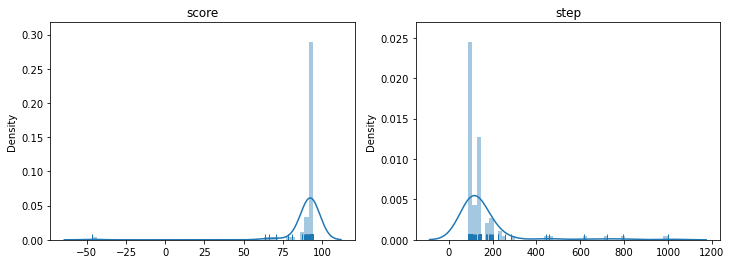

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].set_title('score')
ax[1].set_title('step')
sns.distplot(scores, rug=True, ax=ax[0])
sns.distplot(steps, rug=True, ax=ax[1])

print(np.mean(scores))

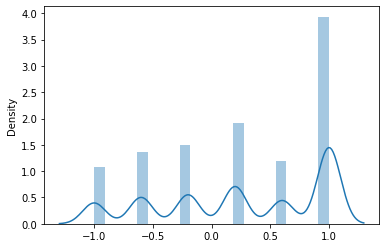

In [ ]:
sns.distplot(select_actions)

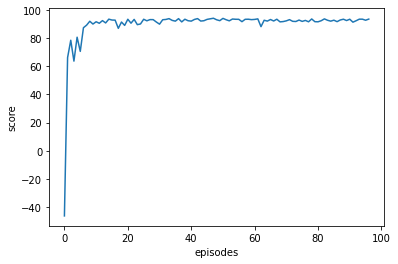

In [ ]:
plt.plot(scores)
plt.xlabel('episodes')
plt.ylabel('score')
plt.show()

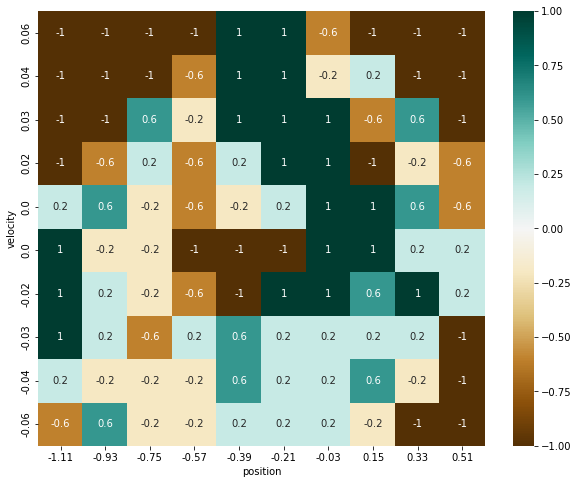

In [ ]:
q_values = []
for i in range(state_grid_count):
    q_values.append([])
    for j in range(state_grid_count):
        action_idx = np.argmax(q_table[i][j])
        q_values[i].append(actions[action_idx])

plt.figure(figsize=(10, 8))
ax = sns.heatmap(q_values, annot=True, cmap='BrBG')
ax.set_xlabel('position')
ax.set_ylabel('velocity')
xticks = env.observation_space.low[0] + range(state_grid_count+1) * abs((env.observation_space.high[0] - env.observation_space.low[0]) / state_grid_count)
xticks = [int((xticks[idx] + xticks[idx+1]) / 2 * 100) / 100 for idx, xtick in enumerate(xticks[:-1])]
ax.set_xticklabels(xticks)
yticks = env.observation_space.low[1] + range(state_grid_count+1) * abs((env.observation_space.high[1] - env.observation_space.low[1]) / state_grid_count)
yticks = [int((yticks[idx] + yticks[idx+1]) / 2 * 100) / 100 for idx, ytick in enumerate(yticks[:-1])]
ax.set_yticklabels(yticks)
ax.invert_yaxis()
plt.show()

In [ ]:
env.close()
env = wrap_env(gym.make('MountainCarContinuous-v0'))

score = 0
step = 0
previous_obs = env.reset()

while True:
    state_idx = obs_to_state(env, previous_obs)
    if random.random() < epsilon:
        action_idx = random.randint(0, action_grid_count-1)
        action = actions[action_idx]
    else:
        logits = q_table[state_idx[0]][state_idx[1]]
        action_idx = np.argmax(softmax(logits))
        action = actions[action_idx]

    obs, reward, done, info = env.step([action])
    previous_obs = obs
    score += reward
    step += 1
    
    if done:
        break

print('score:', score)
print('step:', step)
env.close()
show_video()

score: 92.27599961423873
step: 99
